In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

files = []

# files.append("BRISMFRecommender_NoForgetting.dat")
# files.append("BRISMFRecommender_UserFactorFading.dat")
# files.append("BRISMFRecommender_ForgetUnpopularItems.dat")
# files.append("BRISMFRecommender_SDUserFactorFading.dat")

files.append("MFRecommender_NoForgetting.dat")
files.append("MFRecommender_UserFactorFading.dat")
files.append("MFRecommender_ForgetUnpopularItems.dat")
files.append("MFRecommender_SDUserFactorFading.dat")

__RECALLAT__ = 10

In [2]:
class Recall:
    def __init__(self, n):
        self.n = n
        self.hits = 0
        self.stream = 0 
    def update(self, rank):
        if rank <= self.n:
            self.hits += 1
        self.stream += 1
        return self.score()
    def score(self):
        return self.hits/self.stream

In [3]:
# (top-1 score, where the correct item is ranked, rec time, update time)

defined = False
recallDF = None
uptimeDF = None
rectimeDF = None
for file in files:
    recall = Recall(__RECALLAT__)
    with open("D:\\recsys\\flurs\\results\\{}".format(file)) as f:
        file = file.replace('.dat','')
        file = file.replace('Recommender_','/')
        data = f.read().split(')')
        data.remove('')
        recallList = []
        uptimeList = []
        rectimeList = []
        indexList = []
        for index, line in enumerate(data):
            line = line.replace('(','')
            line = line.replace(' ','')
            info = line.split(',')
            recallList.append(recall.update(int(info[1])))
            uptimeList.append(float(info[2]))
            rectimeList.append(float(info[3]))
            indexList.append(index)
        if defined:
            recallDF = recallDF.merge(pd.DataFrame({file : recallList, "Index": indexList}), on='Index', how='left')
            uptimeDF = uptimeDF.merge(pd.DataFrame({file : uptimeList, "Index": indexList}), on='Index', how='left')
            rectimeDF = rectimeDF.merge(pd.DataFrame({file : rectimeList, "Index": indexList}), on='Index', how='left')
        else:
            defined = True
            recallDF = pd.DataFrame({"Index": indexList, file : recallList})
            uptimeDF = pd.DataFrame({"Index": indexList, file : uptimeList})
            rectimeDF = pd.DataFrame({"Index": indexList, file : rectimeList})

recallDF = recallDF.drop(columns=['Index'])
uptimeDF = uptimeDF.drop(columns=['Index'])
rectimeDF = rectimeDF.drop(columns=['Index'])

In [4]:
list(recallDF)

['MF/NoForgetting',
 'MF/UserFactorFading',
 'MF/ForgetUnpopularItems',
 'MF/SDUserFactorFading']

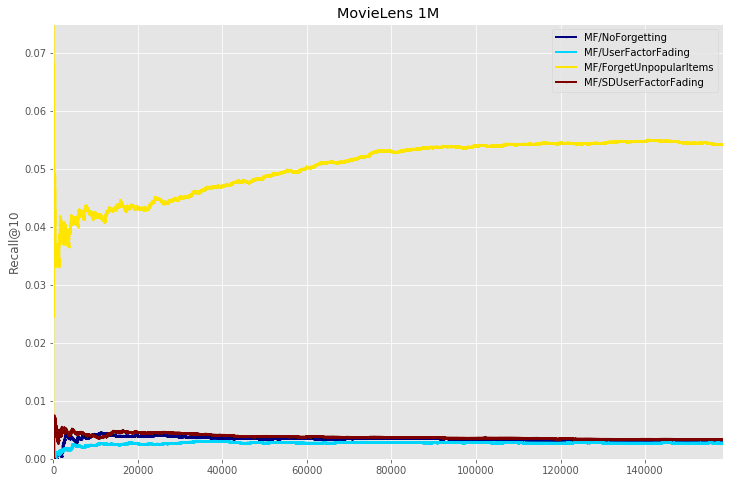

In [5]:
plt.rcParams['figure.figsize'] = (12,8)
with plt.style.context(('ggplot')):
    ax = recallDF.plot(lw=2, colormap='jet', marker='.', markersize=1, title="MovieLens 1M")
    plt.ylim([0,0.075])
    ax.set(xlabel="", ylabel='Recall@{}'.format(__RECALLAT__))

In [6]:
recallDF.mean()

MF/NoForgetting            0.003462
MF/UserFactorFading        0.002749
MF/ForgetUnpopularItems    0.050524
MF/SDUserFactorFading      0.003834
dtype: float64